# 目的
- チョコボールの集計をする

In [1]:
import os, sys
import numpy as np
import pandas as pd
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import ChocoUtils as cu
sns.set()

In [2]:
dbfile = '../../data/choco-ball.db'
data = cu.get_data(db_file=dbfile)
data = data.drop(columns=['shop', 'factory'])
data.head()

SELECT measure_date, best_before, prd_number, weight, box_weight, ball_number, factory, shop, angel, campaign, taste, buyer, (weight - box_weight), (weight - box_weight)/ball_number FROM measurement ;
Shape of MeasurementData(record_num, n_columns) : (674, 14)


,measure_date,best_before,prd_number,weight,box_weight,ball_number,angel,campaign,taste,buyer,net_weight,mean_weight
0,2017-11-19,None,None,34.002,4.756,16,0,1,0,時田,29.246,1.827875
1,2017-11-20,None,None,34.435,4.805,17,0,1,0,時田,29.630,1.742941
2,2017-11-21,2018-06-01,None,34.000,4.815,18,0,1,0,時田,29.185,1.621389
3,2017-11-22,2018-06-01,None,34.193,4.818,17,0,1,0,時田,29.375,1.727941
4,2017-11-23,2018-06-01,None,35.344,4.836,16,0,1,0,時田,30.508,1.906750


In [3]:
tastes = pd.read_csv('../choco_tastes.csv')
tastes.head()

,id,name,name_en,spec
0,0,ピーナツ,peanut,28
1,1,いちご,strawberry,25
2,2,金のきなこもち,kinako,29
3,3,レモングミ,lemon,29
4,4,甘酒,amazake,22


In [4]:
data['silver'] = [1 if a else 0 for a in (data.angel == 1)]
data['gold'] = [1 if a else 0 for a in (data.angel == 2)]

# 味毎の集計

In [35]:
sum_cnt = data.groupby(['taste']).count()[['weight']]
sum_sangel = data.groupby(['taste']).sum()[['silver']]
sum_gangel = data.groupby(['taste']).sum()[['gold']]
sum_ball = data.groupby(['taste']).sum()[['ball_number']]
sum_ball.rename(columns={'ball_number':'sum_ball'}, inplace=True)
mean_ball = data.groupby(['taste']).mean()[['ball_number']]
summary = pd.concat([sum_cnt, sum_sangel, sum_gangel, sum_ball, mean_ball], axis=1)
summary.reset_index(drop=False, inplace=True)
summary.rename(columns={'taste':'id', 'weight':'total'}, inplace=True)
summary = pd.merge(summary, tastes, on='id')
summary = summary[['name', 'spec', 'total', 'sum_ball', 'ball_number', 'silver', 'gold']]
summary

,name,spec,total,sum_ball,ball_number,silver,gold
0,ピーナツ,28,471,7735,16.422505,19,1
1,いちご,25,60,905,15.083333,2,0
2,金のきなこもち,29,5,110,22.000000,0,0
3,レモングミ,29,3,67,22.333333,0,0
4,甘酒,22,10,154,15.400000,2,0
5,キャラメル,28,2,39,19.500000,0,0
6,カスタード,22,5,79,15.800000,0,0
7,パチパチ,26,10,162,16.200000,1,0
8,ラムネ,23,3,50,16.666667,0,0
9,パンプキン,22,4,64,16.000000,0,0


In [36]:
for k, v in summary.iterrows():
    print('|', ' | '.join(list(v.astype('str'))), '|')

| ピーナツ | 28 | 471 | 7735 | 16.422505307855626 | 19 | 1 |
| いちご | 25 | 60 | 905 | 15.083333333333334 | 2 | 0 |
| 金のきなこもち | 29 | 5 | 110 | 22.0 | 0 | 0 |
| レモングミ | 29 | 3 | 67 | 22.333333333333332 | 0 | 0 |
| 甘酒 | 22 | 10 | 154 | 15.4 | 2 | 0 |
| キャラメル | 28 | 2 | 39 | 19.5 | 0 | 0 |
| カスタード | 22 | 5 | 79 | 15.8 | 0 | 0 |
| パチパチ | 26 | 10 | 162 | 16.2 | 1 | 0 |
| ラムネ | 23 | 3 | 50 | 16.666666666666668 | 0 | 0 |
| パンプキン | 22 | 4 | 64 | 16.0 | 0 | 0 |
| パイナップル | 22 | 11 | 175 | 15.909090909090908 | 0 | 0 |
| ミルクキャラメル | 22 | 16 | 229 | 14.3125 | 0 | 0 |
| チョコバナナ | 22 | 43 | 646 | 15.023255813953488 | 2 | 0 |
| ホワイトミルクピーナッツ | 28 | 14 | 223 | 15.928571428571429 | 0 | 0 |
| グレープラムネ | 23 | 4 | 70 | 17.5 | 0 | 0 |
| ハイチュウグレープ | 25 | 6 | 95 | 15.833333333333334 | 0 | 0 |
| ミルクココア | 21 | 3 | 43 | 14.333333333333334 | 1 | 0 |
| 謎解き | 21 | 4 | 55 | 13.75 | 0 | 0 |


# 全体個数

In [39]:
total_box = data.shape[0]
total_ball = data.ball_number.sum()
total_weight = data.net_weight.sum()
print('| {} | {} | {} |'.format(total_box, total_ball, total_weight))

| 674 | 10901 | 18938.4643 |


# エンゼルの出現数

In [46]:
data_1 = data.query('campaign == 1')
data_0 = data.query('campaign != 1')
data_0 = data_0[data_0.taste != 10]

In [47]:
dict_sum = dict()
dict_sum['c1'] = {'gold':sum(data_1['angel']==2), 
                  'silver':sum(data_1['angel']==1), 
                  'none':sum(data_1['angel']==0)
                 }
dict_sum['c0'] = {'gold':sum(data_0['angel']==2), 
                  'silver':sum(data_0['angel']==1), 
                  'none':sum(data_0['angel']==0)
                 }
df_sum = pd.DataFrame(dict_sum).T
df_sum = df_sum[['none', 'silver', 'gold']]
df_sum

,none,silver,gold
c1,113,0,1
c0,522,27,0


# 個数の変遷

In [52]:
# ピーナッツ味だけに絞る
df_data = data[data['taste']==0]
print(data.shape)
print(df_data.shape)

(674, 14)
(471, 14)


In [53]:
df_data.head()

,measure_date,best_before,prd_number,weight,box_weight,ball_number,angel,campaign,taste,buyer,net_weight,mean_weight,silver,gold
0,2017-11-19,None,None,34.002,4.756,16,0,1,0,時田,29.246,1.827875,0,0
1,2017-11-20,None,None,34.435,4.805,17,0,1,0,時田,29.630,1.742941,0,0
2,2017-11-21,2018-06-01,None,34.000,4.815,18,0,1,0,時田,29.185,1.621389,0,0
3,2017-11-22,2018-06-01,None,34.193,4.818,17,0,1,0,時田,29.375,1.727941,0,0
4,2017-11-23,2018-06-01,None,35.344,4.836,16,0,1,0,時田,30.508,1.906750,0,0


In [58]:
# 外れ値（多分記録ミス）を除外
df_data = df_data.dropna(subset=['best_before'])
df_data = df_data[-df_data['best_before'].isin(['2018-02-01'])]
print(data.shape)
print(df_data.shape)

(674, 14)
(467, 14)


In [59]:
df_data['bb_date'] = pd.to_datetime(df_data['best_before'])
df_data['bb_year'] = [x.strftime('%Y') for x in df_data['bb_date']]
df_data['bb_month'] = [x.strftime('%m') for x in df_data['bb_date']]
df_data['bb_ym'] = [x.strftime('%Y/%m') for x in df_data['bb_date']]
df_data.head()

,measure_date,best_before,prd_number,weight,box_weight,ball_number,angel,campaign,taste,buyer,net_weight,mean_weight,silver,gold,bb_date,bb_year,bb_month,bb_ym
2,2017-11-21,2018-06-01,None,34.000,4.815,18,0,1,0,時田,29.185,1.621389,0,0,2018-06-01,2018,06,2018/06
3,2017-11-22,2018-06-01,None,34.193,4.818,17,0,1,0,時田,29.375,1.727941,0,0,2018-06-01,2018,06,2018/06
4,2017-11-23,2018-06-01,None,35.344,4.836,16,0,1,0,時田,30.508,1.906750,0,0,2018-06-01,2018,06,2018/06
5,2017-11-23,2018-06-01,None,34.031,4.836,18,0,1,0,時田,29.195,1.621944,0,0,2018-06-01,2018,06,2018/06
6,2017-11-23,2018-06-01,None,34.198,4.834,18,0,1,0,時田,29.364,1.631333,0,0,2018-06-01,2018,06,2018/06


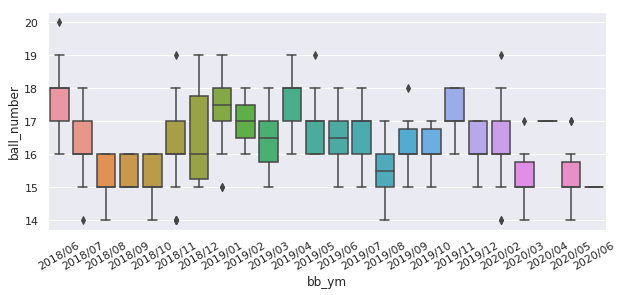

In [61]:
date_list = list(set(df_data['bb_ym']))
date_list.sort()

fig = plt.figure(figsize=(10, 4))
ax = fig.subplots(1, 1)

ax = sns.boxplot(x="bb_ym", y="ball_number", data=df_data, 
                 order=date_list, ax=ax)
ret = ax.set_xticklabels(date_list, rotation=30)

plt.savefig('n_ball_bplot_all.png')

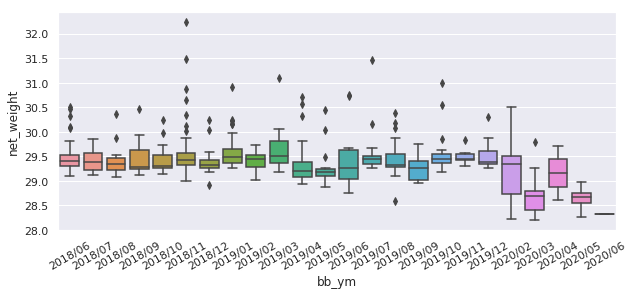

In [62]:
fig = plt.figure(figsize=(10, 4))
ax = fig.subplots(1, 1)

ax = sns.boxplot(x="bb_ym", y="net_weight", data=df_data, 
                 order=date_list, ax=ax)
ret = ax.set_xticklabels(date_list, rotation=30)